In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag, correct_flux_excess_factor
from download_isochrone import load_isochrone
from simbad_download import resolve_name

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Configuration file not found:

    /home/maya/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


# CMD diagram

In [2]:
CLUSTER_NAME: str = 'Trumpler 5'

In [3]:
cp_ra, cp_dec, cp_par, cp_pmra, cp_pmdec, cp_radvel = resolve_name(CLUSTER_NAME)

In [4]:
isochrone: np.ndarray = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [5]:
clustered: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')
lit: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_literature.csv')

## Total mass

In [6]:
lit.link_bibcode.unique()

array(['2018A&A...618A..93C'], dtype=object)

In [7]:
found.head()

,Unnamed: 0,EDR3 id,reported,TIC,solution_id,designation,source_id,random_index,ref_epoch,ra,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,occurences
0,18,3326759896569333760,3,NaN,1636148068921376768,Gaia DR3 3326759896569333760,3326759896569333760,895259252,2016.0,99.180149,...,2.310027,1.449848,0.857801,0.553455,0.603479,0.012220,2.733251,0.702601,0.067272,0.22
1,22,3326760966019844480,3,NaN,1636148068921376768,Gaia DR3 3326760966019844480,3326760966019844480,243075725,2016.0,99.093215,...,2.648905,1.662539,0.983639,0.634647,0.506112,0.007950,1.958441,0.534605,0.090560,0.30
2,25,3326761515775613440,3,NaN,1636148068921376768,Gaia DR3 3326761515775613440,3326761515775613440,1399088087,2016.0,99.143423,...,2.121300,1.331397,0.787719,0.508239,0.814025,0.032801,4.092497,0.815882,0.150823,0.22
3,40,3326766807175232640,3,NaN,1636148068921376768,Gaia DR3 3326766807175232640,3326766807175232640,1136160716,2016.0,99.259333,...,2.442775,1.533165,0.907095,0.585260,0.603314,0.016378,3.308879,0.563730,0.087466,0.20
4,41,3326766841534985856,3,NaN,1636148068921376768,Gaia DR3 3326766841534985856,3326766841534985856,982602799,2016.0,99.241208,...,2.427486,1.523570,0.901418,0.581597,1.056573,0.002343,0.176449,0.157127,0.102967,0.82


In [8]:
not_found = pd.merge(not_found, lit[['EDR3 id', 'link_bibcode']], on='EDR3 id')

In [9]:
not_found[not_found.occurences==0.0]['link_bibcode'].value_counts()

2018A&A...618A..93C    25
Name: link_bibcode, dtype: int64

In [10]:
clustered = add_colors_and_abs_mag(clustered)
found = add_colors_and_abs_mag(found)
not_found = add_colors_and_abs_mag(not_found)

In [12]:
len(found[found.occurences>=0.84])

322

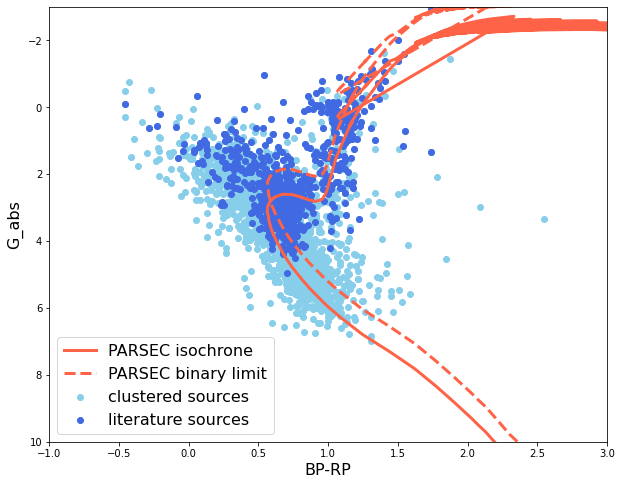

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(found['BP-RP'], found['G_abs'], color='royalblue', label='literature sources')
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);

# Not found?

In [14]:
print(f'{len(not_found[not_found.occurences==0.0])} literature sources were not clustered.')

25 literature sources were not clustered.


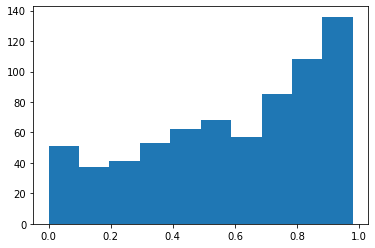

In [15]:
plt.hist(not_found.occurences);

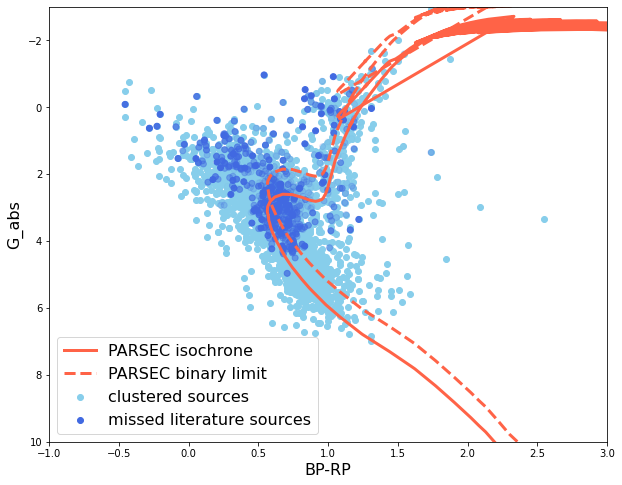

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(not_found['BP-RP'], not_found['G_abs'], color='royalblue',
            label='missed literature sources', alpha=1-not_found['occurences'])
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

In [17]:
def found_vs_not_found_hist(found: pd.DataFrame,
                            not_found: pd.DataFrame,
                            prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', alpha=0.5, label='Found literature sources', density=True, bins=50)
    plt.hist(not_found[prop], color='tomato', alpha=0.5, label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);

In [18]:
def found_vs_not_found_hist_xlines(found: pd.DataFrame,
                                   not_found_values: list,
                                   prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', label='Found literature sources', density=True, bins=20)
    for val in not_found_values:
        plt.axvline(x=val, linestyle='--', color='black', linewidth=2)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16)

In [19]:
def not_found_hist(not_found: pd.DataFrame,
                   prop: str,
                   threshold: float = None):
    plt.figure(figsize=(8, 5))
    plt.hist(not_found[prop], color='tomato', label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);
    if threshold:
        plt.axvline(x=threshold, linestyle='--', color='black', linewidth=2)

In [20]:
%matplotlib notebook

In [21]:
tot_not_found = not_found[not_found.occurences==0]
correct_par_error = tot_not_found[tot_not_found.parallax_over_error>10]

<IPython.core.display.Javascript object>


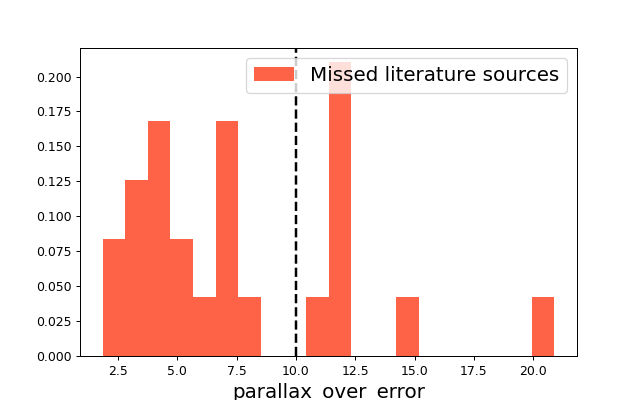

In [22]:
not_found_hist(tot_not_found, 'parallax_over_error', 10.0);

In [23]:
len(correct_par_error)

8

<IPython.core.display.Javascript object>


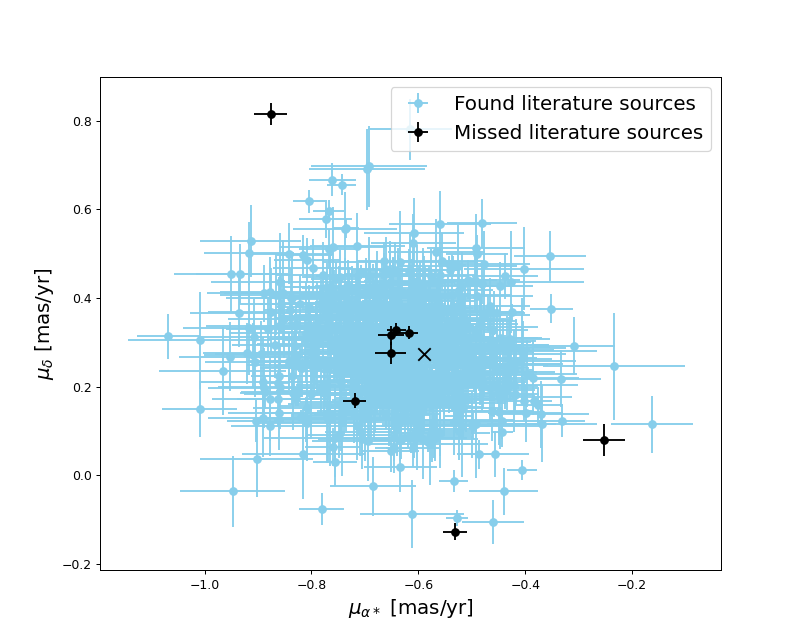

In [24]:
plt.figure(figsize=(10, 8))
plt.errorbar(found.pmra, found.pmdec, xerr=found.pmra_error,
             yerr=found.pmdec_error, color='skyblue', fmt='o', zorder=0,
             label='Found literature sources')
plt.errorbar(correct_par_error.pmra, correct_par_error.pmdec, 
            xerr=correct_par_error.pmra_error,
            yerr=correct_par_error.pmdec_error, fmt='o', color='black', zorder=1,
            label='Missed literature sources')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=2)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

<IPython.core.display.Javascript object>


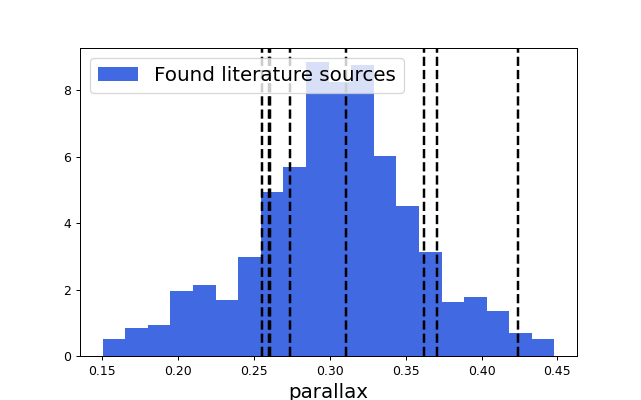

In [25]:
found_vs_not_found_hist_xlines(found, correct_par_error.parallax.values, 'parallax')

In [26]:
correct_par_error.ruwe

0      1.131189
4      1.004396
8      1.143178
11     0.998219
51     1.016297
52     1.051273
228    1.142912
229    1.110315
Name: ruwe, dtype: float64

<IPython.core.display.Javascript object>


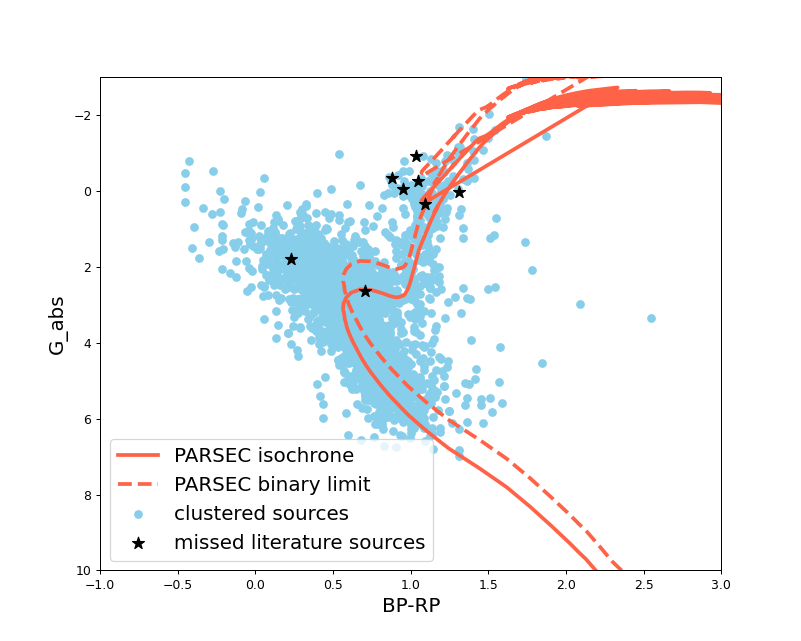

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue',
            label='clustered sources');
plt.scatter(correct_par_error['BP-RP'], correct_par_error['G_abs'], color='black',
            label='missed literature sources', zorder=3, marker='*', s=100)
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato',
         linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato',
         linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);

In [28]:
correct_par_error[['excess', 'G_abs', 'parallax', 'ipd_frac_odd_win', 'non_single_star']]

,excess,G_abs,parallax,ipd_frac_odd_win,non_single_star
0,0.091272,-0.915593,0.259737,0,0
4,0.142480,-0.251620,0.260333,0,0
8,0.122513,-0.344849,0.273575,0,0
11,0.059144,2.631469,0.423848,0,0
51,0.048493,1.805775,0.362118,0,0
52,0.076354,-0.032067,0.255318,0,0
228,0.058055,0.351438,0.310612,0,0
229,0.068877,0.036437,0.370396,0,0
